In [ ]:
%matplotlib inline


# Comparison of segmentation and superpixel algorithms


This example compares four popular low-level image segmentation methods.  As
it is difficult to obtain good segmentations, and the definition of "good"
often depends on the application, these methods are usually used for obtaining
an oversegmentation, also known as superpixels. These superpixels then serve as
a basis for more sophisticated algorithms such as conditional random fields
(CRF).


Felzenszwalb's efficient graph based segmentation
-------------------------------------------------
This fast 2D image segmentation algorithm, proposed in [1]_ is popular in the
computer vision community.
The algorithm has a single ``scale`` parameter that influences the segment
size. The actual size and number of segments can vary greatly, depending on
local contrast.

.. [1] Efficient graph-based image segmentation, Felzenszwalb, P.F. and
       Huttenlocher, D.P.  International Journal of Computer Vision, 2004


Quickshift image segmentation
-----------------------------

Quickshift is a relatively recent 2D image segmentation algorithm, based on an
approximation of kernelized mean-shift. Therefore it belongs to the family of
local mode-seeking algorithms and is applied to the 5D space consisting of
color information and image location [2]_.

One of the benefits of quickshift is that it actually computes a
hierarchical segmentation on multiple scales simultaneously.

Quickshift has two main parameters: ``sigma`` controls the scale of the local
density approximation, ``max_dist`` selects a level in the hierarchical
segmentation that is produced. There is also a trade-off between distance in
color-space and distance in image-space, given by ``ratio``.

.. [2] Quick shift and kernel methods for mode seeking,
       Vedaldi, A. and Soatto, S.
       European Conference on Computer Vision, 2008


SLIC - K-Means based image segmentation
---------------------------------------

This algorithm simply performs K-means in the 5d space of color information and
image location and is therefore closely related to quickshift. As the
clustering method is simpler, it is very efficient. It is essential for this
algorithm to work in Lab color space to obtain good results.  The algorithm
quickly gained momentum and is now widely used. See [3]_ for details.  The
``compactness`` parameter trades off color-similarity and proximity, as in the
case of Quickshift, while ``n_segments`` chooses the number of centers for
kmeans.

.. [3] Radhakrishna Achanta, Appu Shaji, Kevin Smith, Aurelien Lucchi,
    Pascal Fua, and Sabine Suesstrunk, SLIC Superpixels Compared to
    State-of-the-art Superpixel Methods, TPAMI, May 2012.


Compact watershed segmentation of gradient images
-------------------------------------------------

Instead of taking a color image as input, watershed requires a grayscale
*gradient* image, where bright pixels denote a boundary between regions.
The algorithm views the image as a landscape, with bright pixels forming high
peaks. This landscape is then flooded from the given *markers*, until separate
flood basins meet at the peaks. Each distinct basin then forms a different
image segment. [4]_

As with SLIC, there is an additional *compactness* argument that makes it
harder for markers to flood faraway pixels. This makes the watershed regions
more regularly shaped. [5]_

.. [4] https://en.wikipedia.org/wiki/Watershed_%28image_processing%29

.. [5] Peer Neubert & Peter Protzel (2014). Compact Watershed and
       Preemptive SLIC: On Improving Trade-offs of Superpixel Segmentation
       Algorithms. ICPR 2014, pp 996-1001. :DOI:`10.1109/ICPR.2014.181`
       https://www.tu-chemnitz.de/etit/proaut/forschung/rsrc/cws_pSLIC_ICPR.pdf



In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Felzenszwalb number of segments: 194
SLIC number of segments: 190
Quickshift number of segments: 695


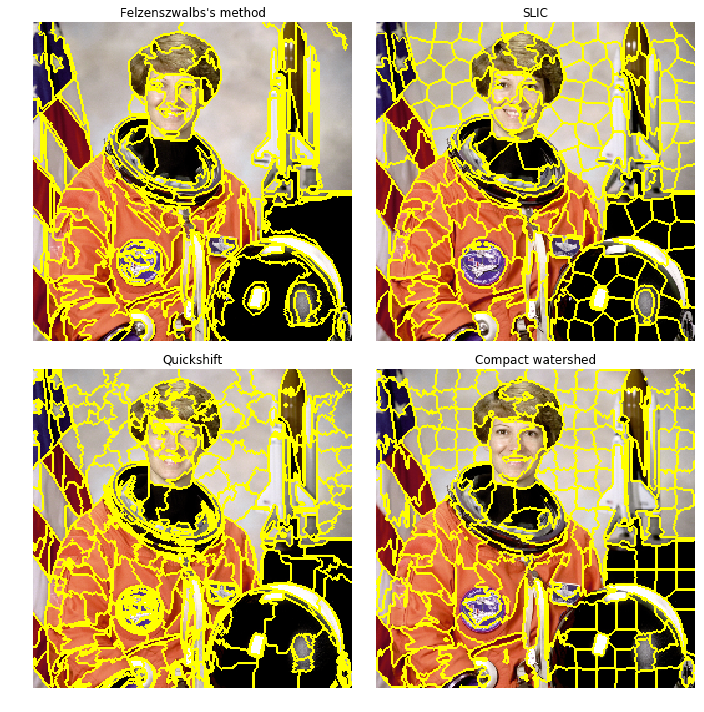

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(astronaut()[::2, ::2])

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()